## Exercise 3

In [1]:
import torch
from Fast_MRI_dataloader import create_dataloaders
from tqdm import tqdm 
import matplotlib.pyplot as plt
from torch.fft import fft2, fftshift, ifft2

Exerise 3a:

In [3]:
def get_k_space(input) :
    # get the k-space
    k_space = fftshift(fft2(input))
    return k_space
    
# define parameters
data_loc = 'Fast_MRI_Knee/' #change the datalocation to something that works for you
batch_size = 6

train_loader, test_loader = create_dataloaders(data_loc, batch_size)

# go over the dataset
for i,(kspace, M, gt) in enumerate(tqdm(test_loader)):
    if i == 1:
        break
print ("kspace shape: ", kspace.shape)
print ("M shape: ", M.shape)
print ("gt shape: ", gt.shape)

  2%|▏         | 1/41 [00:00<00:10,  3.87it/s]

kspace shape:  torch.Size([6, 320, 320])
M shape:  torch.Size([6, 320, 320])
gt shape:  torch.Size([6, 320, 320])


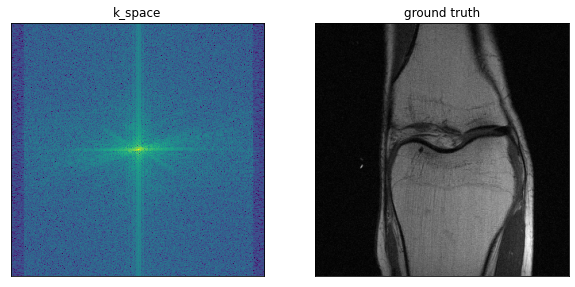

In [6]:
k_space = get_k_space(gt)
        
kspace_plot_friendly = torch.log(torch.abs(k_space[0,:,:])+1e-20)

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(kspace_plot_friendly,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('k_space')

plt.subplot(1,2,2)
plt.imshow(gt[0,:,:],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('ground truth')

plt.savefig("figures/exc_3a.png",dpi=300,bbox_inches='tight')
plt.show()

Exerise 3b:

FileNotFoundError: [Errno 2] No such file or directory: '/figures/exc_3b.png'

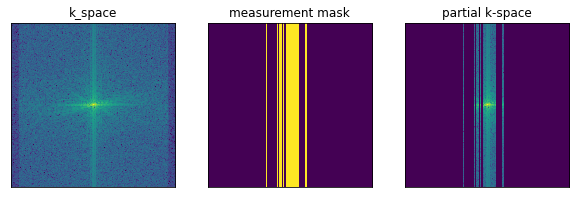

In [7]:
def get_partial_k_space(input,M) :
    return  torch.mul(input, M)

par_k_space = get_partial_k_space(k_space, M)

par_k_space_friendly = torch.log(torch.abs(par_k_space[0,:,:])+1e-20)

plt.figure(figsize = (10,10))

plt.subplot(1,3,1)
plt.imshow(kspace_plot_friendly,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('k_space')

plt.subplot(1,3,2)
plt.imshow(M[0,:,:],interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('measurement mask')

plt.subplot(1,3,3)
plt.imshow(par_k_space_friendly,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('partial k-space')

plt.savefig("figures/exc_3b.png",dpi=300,bbox_inches='tight')
plt.show()

Exerise 3c:

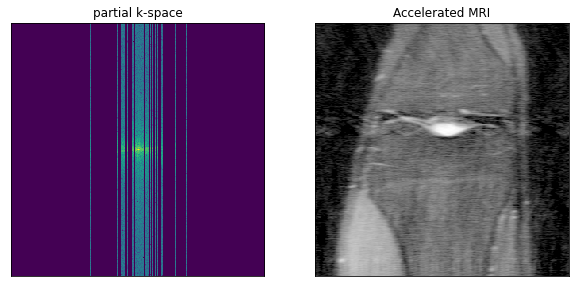

In [9]:
def get_accelerate_MRI(input) :
    return ifft2(input)

fastmri = get_accelerate_MRI(par_k_space)
fastmri_plot_friendly = torch.log(torch.abs(fastmri[3,:,:])+1e-20)

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(par_k_space_friendly,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('partial k-space')

plt.subplot(1,2,2)
plt.imshow(fastmri_plot_friendly,vmin=-2,interpolation='nearest',cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Accelerated MRI')

#plt.savefig("assignment_4/figures/3a.png",dpi=300,bbox_inches='tight')
plt.show()

Exerise 3d:

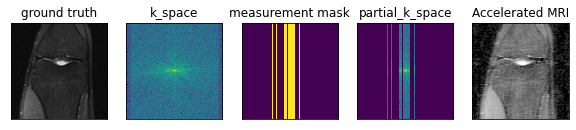

In [10]:
plt.figure(figsize = (10,10))

plt.subplot(1,5,1)
plt.imshow(gt[1,:,:],cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('ground truth')

plt.subplot(1,5,2)
plt.imshow(kspace_plot_friendly,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('k_space')

plt.subplot(1,5,3)
plt.imshow(M[0,:,:],interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('measurement mask')

plt.subplot(1,5,4)
plt.imshow(par_k_space_friendly,vmin=-2,interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('partial_k_space')

plt.subplot(1,5,5)
plt.imshow(fastmri_plot_friendly,vmin=-2,interpolation='nearest',cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Accelerated MRI')


#plt.savefig("assignment_4/figures/3a.png",dpi=300,bbox_inches='tight')
plt.show()